<a href="https://colab.research.google.com/github/TurkuNLP/Deep_Learning_in_LangTech_course/blob/master/dl_in_hlt_exercise1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise task 1: Subword tokenization

Let's use these models:

Finnish:

* Monolingual model: [TurkuNLP/bert-base-finnish-cased-v1](https://huggingface.co/TurkuNLP/bert-base-finnish-cased-v1) (Finnish)
* Multilingual model: [bert-base-multilingual-cased](https://huggingface.co/bert-base-multilingual-cased) (104 languages including Finnish)

English:

* Monolingual model: [bert-base-cased](https://huggingface.co/bert-base-cased) (English)
* Multilingual model: [bert-base-multilingual-cased](https://huggingface.co/bert-base-multilingual-cased) (104 languages including English)

In [1]:
# Install the required Python packages using pip:
# - transformers is a popular deep learning package
!pip3 install -q transformers

In [2]:
from transformers import AutoTokenizer
from pprint import PrettyPrinter

pprint = PrettyPrinter(compact=True).pprint

# initialize the models
fi_mono = AutoTokenizer.from_pretrained("TurkuNLP/bert-base-finnish-cased-v1")
en_mono = AutoTokenizer.from_pretrained("bert-base-cased")
multi = AutoTokenizer.from_pretrained("bert-base-multilingual-cased") # shared multilingual tokenizer

# there are several different tokenization implementations available (BertTokenizer, RobertaTokenizer, GPT2Tokenizer...),
# AutoTokenizer automatically selects the correct implementation based on the model name (e.g. "bert-base-cased" is a BertTokenizerFast)
print(en_mono.__class__)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/56.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/433 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/424k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/816k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

<class 'transformers.models.bert.tokenization_bert_fast.BertTokenizerFast'>


In [3]:
# Vocabulary size

print("fi_mono:", fi_mono.vocab_size)
print("en_mono:", en_mono.vocab_size)
print("multi:", multi.vocab_size)


fi_mono: 50105
en_mono: 28996
multi: 119547


* Vocabulary size is bigger in the multilingual model
* ...however, not 100 x bigger, so one could assume a single language is not represented as well as in the monolingual model

In [4]:
fi_text = """
Tilastollinen kielimalli on sanajonon sanojen todennäköisyysjakauma
tai sellainen todennäköisyysfunktio, joka tuottaa jakauman.
Kielimalli voidaan määritellä myös sanan osille, kuten morfeemeille.
Todennäköisyyksien avulla kielimallit osaavat muun muassa ennustaa,
miten jonkin lauseen tulisi jatkua, vastata kysymyksiin, tai muodostaa
kehotteen avulla pitkiäkin tekstejä kuten keskusteluja, runoja, koodeja
tai artikkeleita.
"""

en_text = """
The statistical language model is the probability distribution of words
in a word sequence or a probability function that produces a distribution.
A language model can also be defined for parts of a word, such as morphemes.
Probabilistic language models can be used to predict, among other things,
how a sentence should continue, answer questions, or from the given prompt
formulate long texts such as conversations, poems, code, or articles.
"""

def visualize_tokenizer(tokenizer, text):
  tokenized = tokenizer.tokenize(text) # <--- this line does the tokenization (text in, list of subwords out)
  pprint(" ".join(tokenized))
  print("Number of subwords:", len(tokenized), "\n")

# English

print("English monolingual:")
visualize_tokenizer(en_mono, en_text)
print("English multilingual:")
visualize_tokenizer(multi, en_text)


# Finnish

print("Finnish monolingual:")
visualize_tokenizer(fi_mono, fi_text)
print("Finnish multilingual:")
visualize_tokenizer(multi, fi_text)

English monolingual:
('The statistical language model is the probability distribution of words in a '
 'word sequence or a probability function that produces a distribution . A '
 'language model can also be defined for parts of a word , such as m ##or '
 '##phe ##mes . Pro ##ba ##bil ##istic language models can be used to predict '
 ', among other things , how a sentence should continue , answer questions , '
 'or from the given pro ##mpt formula ##te long texts such as conversations , '
 'poems , code , or articles .')
Number of subwords: 89 

English multilingual:
('The statistical language model is the probability distribution of words in a '
 'word sequence or a probability function that produces a distribution . A '
 'language model can also be defined for parts of a word , such as mor ##phe '
 '##mes . Pro ##babil ##istic language models can be used to pred ##ict , '
 'among other things , how a sentence should continue , answer questions , or '
 'from the given pro ##mpt formul

*   English results very similar in both monolingual and multilingual tokenizers
  - Multilingual vocabulary includes many English words
  - Tokenizer was trained on a dataset which includes a lot of English? [Yes!](https://github.com/google-research/bert/blob/master/multilingual.md)
  - If English reserves much space from the vocabulary, how about other 100+ languages?

*   Finnish results look completely different!
  - Monolingual vocabulary includes many Finnish words, but multilingual does not and therefore the words are divided into smaller subwords
  - Finnish just one of the small languages? [Finnish about #30 out of 100+ languages](https://meta.wikimedia.org/wiki/List_of_Wikipedias)



# ChatGPT tokenization

* https://platform.openai.com/tokenizer

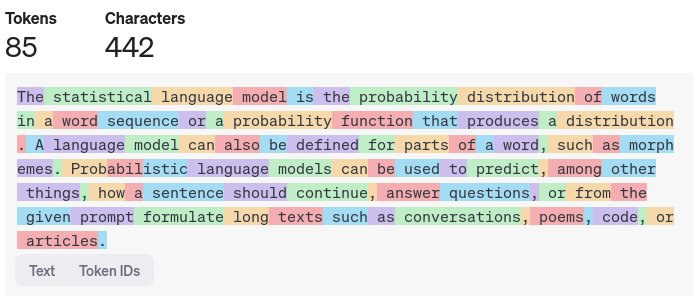

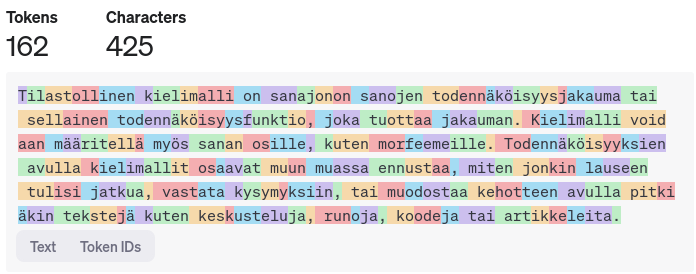

*   About same amount of characters but Finnish has double the amount of tokens compared to English
  - Still the model is very fluent in understanding or generating Finnish, so this does not seem to be a problem in model performance (accuracy)!
* However, it has several other negative outcomes:
  - Sequence length becomes longer --> more computation required, not able to include as much text to the context window (09/2024 GPT-4o has 128K context window)
  - Pricing is by number of tokens (e.g. 09/2024 GPT-4o costs \$5.00/1M input tokens + \$15.00/1M output tokens) --> Finnish more expensive to run!